In [1]:
import numpy as np
import statistics
import pandas as pd
import matplotlib.pyplot as plt
import scipy.signal as signal
from scipy import fftpack
from scipy.fft import irfft
import scipy.optimize as optimize
from scipy.fftpack import fft, fftfreq, ifft

# Get Signal Parameters

Testing the simulation:

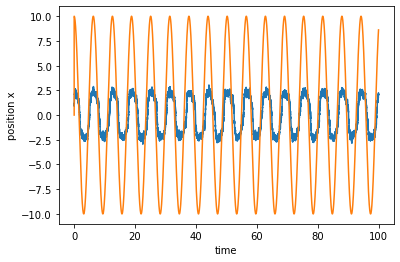

In [2]:
import numpy as np
import matplotlib.pyplot as plt


simulation_time = 100.0
sigma = 1
A =10
T = 100
omega = 1
dt = 0.001
sqdt = np.sqrt(dt)  # Precompute
time = np.arange(0, simulation_time, dt)
x = np.empty(len(time))
x2 = np.empty(len(time))

# Initial conditions
x[0] = 1.0

i = 1
for t in time[1:]:
    fx = x[i-1] - x[i-1]*x[i-1]*x[i-1] + A*np.cos(omega*t)
    x2[i] = A*np.cos(omega*t)
    gx = sigma
    x[i] = x[i-1] + dt*fx + sqdt*gx*np.random.standard_normal()
    i += 1



plt.plot(time, x)
plt.plot(time, x2)
plt.xlabel('time')
plt.ylabel('position x')
plt.savefig('First_Test_of_Simulation.png')
plt.show()


## Get Amplitudes

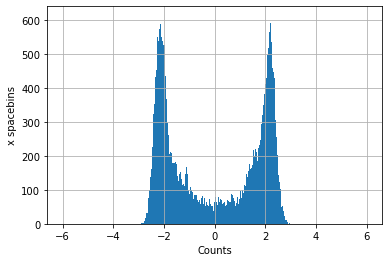

In [3]:
bins = np.linspace(-6,6,1200)
period_of_bins = 12/12000
histogramm = np.histogram(x,bins=bins)

plt.hist(x, bins=bins)
plt.grid()
plt.xlabel(r'Counts')
plt.ylabel('x spacebins')
plt.savefig('Histogram_for_Calc_Amplitudes.png')
plt.show()

Binning the positional data from the signal, produces a histogram, that exhibits two distinct peaks, which are produced by the signals periodicity. These two peaks also contain the amplitude information. The data between x = -5.5 and x = -2.5 will be used to determine the minimum, and the data between x = 2 and x = 5.5 will be used to calculate the maximima in the signal.

In [4]:
from scipy.stats import norm

# Minimum
minima_data = x[(x>-5.5)&(x<-2)]
mu_min, std_min = norm.fit(minima_data)
print(f'Maximum: mean: {mu_min}, standard deviation: {std_min}')

# Maximum
maximum_data = x[(x>2)&(x<5.5)]
mu_max, std_max = norm.fit(maximum_data)
print(f'Maximum: mean: {mu_max}, standard deviation: {std_max}')


Maximum: mean: -2.2409448141618786, standard deviation: 0.16088296673406569
Maximum: mean: 2.258564381003557, standard deviation: 0.16749365637326716


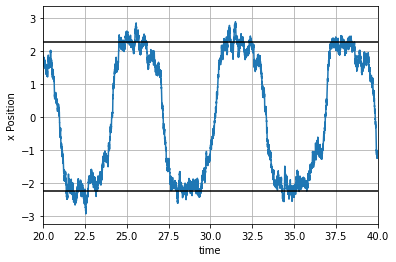

In [5]:
plt.plot(time,x)
plt.hlines(y=mu_max,xmin=20, xmax=40,color='black')
plt.hlines(y=mu_min, xmin=20, xmax=40,color='black')
#plt.plot(time+phase_shift,0.25*x2)
plt.xlim([20,40])
plt.grid()
plt.xlabel(r'time')
plt.ylabel('x Position')
plt.savefig('Show_calculated_Amplitudes.png')

## Phaseshift

 Now for finding the phase shift with the parameters Sigma=5 and A=50. Additionally the noisy signal was filtered. 
 

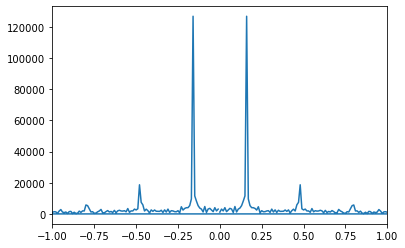

In [6]:
spectrum_scipy = fft(x)
F = fftfreq(len(x),dt)
Fpositive =np.where(F>=0)
plt.plot(F,np.absolute(spectrum_scipy))
plt.xlim([-1,1])
plt.savefig('Spectrum_for_Phaseshift_Calc.png')

In [7]:
spectrum_absolute=np.absolute(spectrum_scipy)
spectrum_absolute[F<0]=0
pick =np.max(spectrum_absolute)
#spectrum_filter = np.where((np.absolute(F)<0.25),spectrum_scipy,0)
spectrum_filter = np.where((spectrum_absolute==pick),spectrum_scipy,0)



#spectrum_filter = np.where((np.absolute(F)<0.25),spectrum_scipy,0)
signal_filter   = ifft(spectrum_filter)

spectrum_output = fft(signal_filter)
# Use correlation to evaluate the phase shift
corr_scipy = np.correlate(signal_filter,x2,mode='same')
lags   = time-50
# Get the maximum value from the correlation function
maximum = np.max(corr_scipy)
# Select the lag that corresponds to the maximum in the correlation function
phase_shift = lags[corr_scipy==maximum][0]
print(f'Phase shift: {phase_shift}')

Phase shift: 0.3990000000000009


/home/tim/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


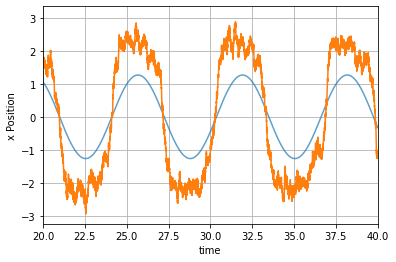

In [8]:
plt.plot(time,signal_filter,alpha=0.7)
plt.plot(time,x)
#plt.plot(time+phase_shift,0.25*x2)
plt.xlim([20,40])
plt.grid()
plt.xlabel(r'time')
plt.ylabel('x Position')
plt.savefig('Show_filtered_Signal_Describes_Signal.png')

As can be seen the filtering process produces a smooth periodic function, without noticeable fluctuations, which matches the periodicidy of the signal.

### Relation between sigma (noise) and the Phaseshift

Phase shift relation with Sigma 
#phase_shift decreases  with increasing Sigma

In [9]:
def Phase_shift_calculation(x,dt,x2):

    spectrum_scipy = fft(x)
    F = fftfreq(len(x),dt)
    spectrum_absolute=np.absolute(spectrum_scipy)
    spectrum_absolute[F<0]=0
    pick =np.max(spectrum_absolute)

    spectrum_filter = np.where((spectrum_absolute==pick),spectrum_scipy,0)

    #spectrum_filter = np.where((np.absolute(F)<0.25),spectrum_scipy,0)
    signal_filter   = ifft(spectrum_filter)

    spectrum_output = fft(signal_filter)
  # Use correlation to evaluate the phase shift
    corr_scipy = np.correlate(signal_filter,x2,mode='same')
    lags   = time-50
  # Get the maximum value from the correlation function
    maximum = np.max(corr_scipy)
  # Select the lag that corresponds to the maximum in the correlation function
    phase_shift = lags[corr_scipy==maximum][0]
    #print(f'Phase shift: {phase_shift}')

    return phase_shift

In [10]:

def Stoch_Res(simulation_time, sigma, A, T, omega, dt):
    sqdt = np.sqrt(dt)  # Precompute
    time = np.arange(0, simulation_time, dt)
    x = np.empty(len(time))
    x2 = np.empty(len(time))
    
    
    x[0] = 1.0

    i = 1
    for t in time[1:]:
        fx = x[i-1] - x[i-1]*x[i-1]*x[i-1] + A*np.cos(omega*t)
        x2[i] = A*np.cos(omega*t)
        gx = sigma
        x[i] = x[i-1] + dt*fx + sqdt*gx*np.random.standard_normal()
        i += 1

    return x,x2, time 


In [11]:
# Calculate Phaseshifts for different sigma
simulation_time = 100.0
A=50
T = 100
omega = 1
dt = 0.001

# start at sigma=0.0001 and end at sigma=10
sigma_s = np.arange(0.0001,50, 2)
#sigma_s=[0.3,10]
phase_shifts = []
phase_shiftstd = []

#x_list=[]
#x2_list=[]
#time_list=[]

# Loop through different sigmas
for b in sigma_s:
    phase_list=[]
    # Make an ensemble and calculate mean phaseshift
    for e in range(20):
        
        # calc algorithm, only change sigma value
        x,x2, time = Stoch_Res(simulation_time, b,A, T, omega, dt)

        # calc Phaseshift
        phaseshift = Phase_shift_calculation(x,dt,x2)
        phase_list.append(phaseshift)
    phasemean=np.mean(phase_list)
    phasestd=np.std(phase_list)
    phase_shifts.append(phasemean)
    phase_shiftstd.append(phasestd)
    print(f'sigma:{b},mean:{phasemean},std:{phasestd}')
       
phase_shifts   = np.array(phase_shifts)
phase_shiftstd = np.array(phase_shiftstd)

sigma:0.0001,mean:0.15100000000000335,std:0.0
sigma:2.0001,mean:0.14485000000000098,std:0.007754192414430011
sigma:4.0001,mean:0.12150000000000105,std:0.01573372174661831
sigma:6.0001,mean:0.1026000000000014,std:0.021564786110695056
sigma:8.0001,mean:0.07340000000000124,std:0.02019257289203148
sigma:10.0001,mean:0.07920000000000123,std:0.046492580053166054
sigma:12.0001,mean:0.05275000000000141,std:0.03292548405111205
sigma:14.0001,mean:0.06100000000000065,std:0.0460922987059656
sigma:16.0001,mean:0.05905000000000129,std:0.045252044152723964
sigma:18.0001,mean:0.04845000000000184,std:0.042870123629399765
sigma:20.0001,mean:0.035000000000000496,std:0.035325628090665535
sigma:22.0001,mean:0.03775000000000084,std:0.06142302092863808
sigma:24.0001,mean:0.03500000000000121,std:0.06965270992574499
sigma:26.0001,mean:0.018650000000000944,std:0.06501559428321697
sigma:28.0001,mean:0.01990000000000016,std:0.05625646629499634
sigma:30.0001,mean:0.05590000000000082,std:0.06731040038508075
sigma:3

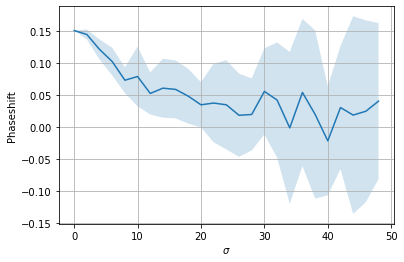

In [12]:
plt.plot(sigma_s,phase_shifts)
plt.fill_between(sigma_s, phase_shifts - phase_shiftstd, phase_shifts + phase_shiftstd, alpha=0.2)
plt.grid()
plt.xlabel(r'$\sigma$')
plt.ylabel('Phaseshift')
plt.savefig('Dependence_Phaseshift_sigma.png')

The figure shows with increasinng the parameter sigma, which corresponds to increasing the amplitude of the noise, the phaseshift decreases. \
\
The noise induces random energy fluctuations in the potential well, in which the particle is trapped. Therefore the energy that is required to exit the potential well can be decreased through fluctuations and the required energy can be further reduced with increasing noise amplitude. As the response of the system is governed by the ability of the particle to leave its current potential well and to change its state by switching to the second potential well, an increasing noise amplitude can lead to a faster response of the system to the periodic forcing and therefore a shorter phaseshift, as is shown by the simulation. One aspect to note is, by increasing the noise to much the system of two potential wells is not distinguishable any more from a system with only noisy energy fluctuations. In this case there are no two distinghiushable states any more and the phaseshift looses its meaning.

### Relation between Amplitude and Phaseshift

 Amplitude Phase_shift relation  #Good to know's part 

In [ ]:
# Calculate Phaseshifts for different As
simulation_time = 100.0
sigma = 0.3
T = 100
omega = 1
dt = 0.001

# start at A=5 and end at A=100
A_s = np.arange(5, 205, 15)

phase_shifts_2   = []
phase_shiftstd_2 = []

for a in A_s:
    phase_list=[]
    # Make an ensemble and calculate mean phaseshift
    for e in range(20):
        
        # calc algorithm, only change sigma value
        x,x2, time = Stoch_Res(simulation_time, sigma,a, T, omega, dt)

        # calc Phaseshift
        phaseshift = Phase_shift_calculation(x,dt,x2)
        phase_list.append(phaseshift)
    phasemean=np.mean(phase_list)
    phasestd=np.std(phase_list)
    phase_shifts_2.append(phasemean)
    phase_shiftstd_2.append(phasestd)
    print(f'A:{a},mean:{phasemean},std:{phasestd}')
    
phase_shifts_2   = np.array(phase_shifts_2)
phase_shiftstd_2 = np.array(phase_shiftstd_2)    
    

A:5,mean:0.6016500000000015,std:0.010228758477938889
A:20,mean:0.2613500000000009,std:0.003182373328194093
A:35,mean:0.18685000000000046,std:0.00200686322403782
A:50,mean:0.1503000000000018,std:0.0015842979517762111
A:65,mean:0.12809999999999988,std:0.0007681145747850707
A:80,mean:0.11280000000000072,std:0.0006000000000000227
A:95,mean:0.101400000000001,std:0.0006633249580726404
A:110,mean:0.09230000000000053,std:0.0005567764362848311


In [ ]:
plt.plot(A_s,phase_shifts_2)
plt.fill_between(A_s, phase_shifts_2 - phase_shiftstd_2, phase_shifts_2 + phase_shiftstd_2, alpha=0.2)
plt.grid()
plt.xlabel(r'Amplitude')
plt.ylabel('Phaseshift')
plt.savefig('Dependence_Phaseshift_Amplitude.png')

With increasing Amlitude of the periodic forcing the systems responds faster and the phaseshift decreases.

## Variation of the Amplitude

(3)variotion Of Amplitude  

In [ ]:
#BY Decreasing A


simulation_time = 100.0
sigma = 0.3
A = 0.01  
T=100
omega = 0.1
dt = 0.001
sqdt = np.sqrt(dt) #Precompute!
sample_freq=200
time = np.arange(0, simulation_time, dt)
x = np.empty(len(time))
x2 = np.empty(len(time))
#Initial conditions 
x[0] = 1.0

i = 1
for t in time[1:]:
    fx = x[i-1] - x[i-1]*x[i-1]*x[i-1] + A*np.cos(omega*t)
    x2[i]=A*np.cos(omega*t)
    gx = sigma
    x[i] = x[i-1] + dt*fx + sqdt*gx*np.random.standard_normal()
    i += 1
plt.figure()
plt.plot(time, x)
#plt.plot(time, x2)
plt.xlabel('time')
plt.ylabel('signal')
plt.savefig('Simulation_with_small_A_0_01.png')
plt.show()


In [ ]:
#By increasing A 

simulation_time = 100.0
sigma = 0.3
A =40 
T=100
omega = 0.1
dt = 0.001
sqdt = np.sqrt(dt) #Precompute!
sample_freq=200
time = np.arange(0, simulation_time, dt)
x = np.empty(len(time))
x2 = np.empty(len(time))
#Initial conditions 
x[0] = 1.0

i = 1
for t in time[1:]:
    fx = x[i-1] - x[i-1]*x[i-1]*x[i-1] + A*np.cos(omega*t)
    x2[i]=A*np.cos(omega*t)
    gx = sigma
    x[i] = x[i-1] + dt*fx + sqdt*gx*np.random.standard_normal()
    i += 1
plt.figure()
plt.plot(time, x)
#plt.plot(time, x2)
plt.xlabel('time')
plt.ylabel('signal')
plt.savefig('Simulation_with_large_A_40.png')
plt.show()


Conclusion ->  with decreasing A system has a random fluctiotions that may lead to random transitions of particles between X=+/-1 and with increasing A particles have more chance to transit between states 

(4) variotion of dt 

In [ ]:
# decreasing of dt 




import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
simulation_time = 100.0
sigma = 0.3
A =10    
T=100
omega = 0.1
dt =0.00001 
sqdt = np.sqrt(dt) #Precompute!
sample_freq=200
time = np.arange(0, simulation_time, dt)
x = np.empty(len(time))
x2 = np.empty(len(time))
#Initial conditions 
x[0] = 1.0

i = 1
for t in time[1:]:
    fx = x[i-1] - x[i-1]*x[i-1]*x[i-1] + A*np.cos(omega*t)
    x2[i]=A*np.cos(omega*t)
    gx = sigma
    x[i] = x[i-1] + dt*fx + sqdt*gx*np.random.standard_normal()
    i += 1
plt.figure()
plt.plot(time, x)
#plt.plot(time, x2)
plt.xlabel('time')
plt.ylabel('signal')
plt.savefig('Simulation_with_small_dt_0_00001.png')
plt.show()

In [ ]:
#Increasing dt 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
simulation_time = 100.0
sigma = 0.3
A =10    
T=100
omega = 0.1
dt =0.2
sqdt = np.sqrt(dt) #Precompute!
sample_freq=200
time = np.arange(0, simulation_time, dt)
x = np.empty(len(time))
x2 = np.empty(len(time))
#Initial conditions 
x[0] = 1.0

i = 1
for t in time[1:]:
    fx = x[i-1] - x[i-1]*x[i-1]*x[i-1] + A*np.cos(omega*t)
    x2[i]=A*np.cos(omega*t)
    gx = sigma
    x[i] = x[i-1] + dt*fx + sqdt*gx*np.random.standard_normal()
    i += 1
plt.figure()
plt.plot(time, x)
#plt.plot(time, x2)
plt.xlabel('time')
plt.ylabel('signal')
plt.savefig('Simulation_with_large_dt_0_2.png')
plt.show()

(with decreasing dt we increase white noise and with increasing niose system can easly switch between states and with increasing dt we decrease noise and system has not anymore  fluctiotions - yeah but this is not the point of the simulation. We scale the amplitude of the noise also with dt, because it is convenient for us, but this is normally not part of the simulation. With increasing dt we can track the movements of the particels between the potential wells more precisely. 